sentiment analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:/Users/GAYATRI/Desktop/Twitter Sentiments.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df.info

<bound method DataFrame.info of           id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]>

In [5]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [7]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [8]:
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [9]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


In [10]:
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: clean_tweet, dtype: object

In [11]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can't, caus, they, don'...
2                              [bihday, your, majesti]
3    [#model, love, take, with, time, urð±!!!, ð...
4                       [factsguide:, societi, #motiv]
Name: clean_tweet, dtype: object

In [12]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv


In [14]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ------- ------------------------------- 61.4/300.2 kB 656.4 kB/s eta 0:00:01
   ------------------------------ --------- 225.3/300.2 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.9 MB/s eta 0:00:00


visualisation of frequent words

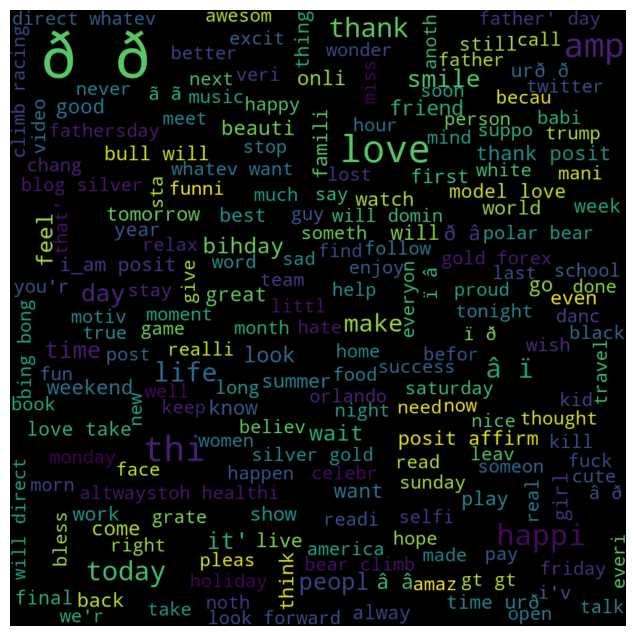

In [23]:
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=1000, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

visualisation for positive sentiments

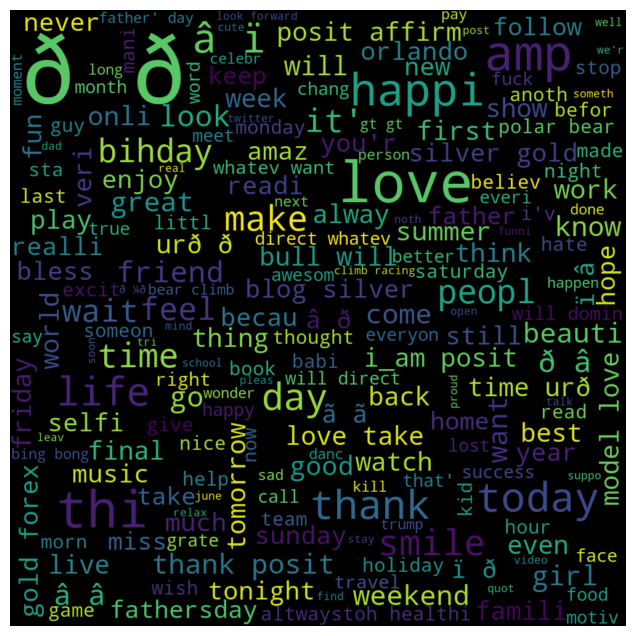

In [19]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=1000, height=1000, random_state=42, max_font_size=150).generate(all_words)


plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

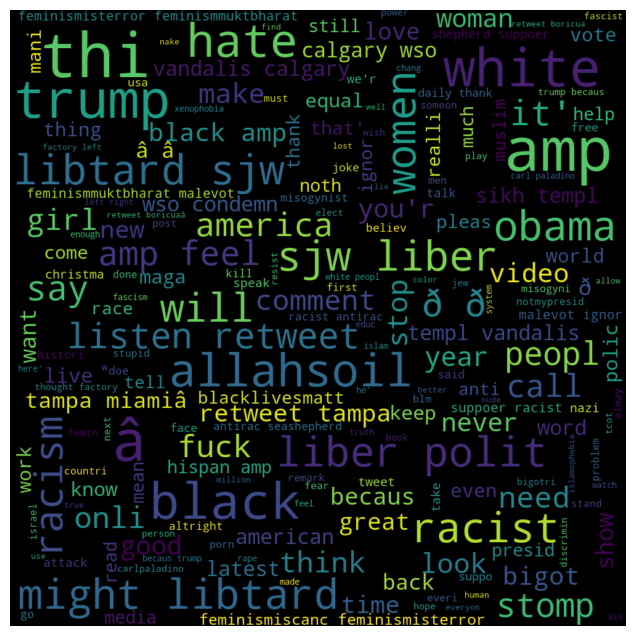

In [22]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=1000, height=1000, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags    

In [25]:
# extract hashtags from poitive tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

In [26]:
# extract hashtags from negative tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [28]:
ht_positive[:20]

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 ['gr8'],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['80day', 'gettingf'],
 ['got7', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro2016'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend']]

In [29]:
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [30]:
ht_positive[:20]

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'gr8']

In [31]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374


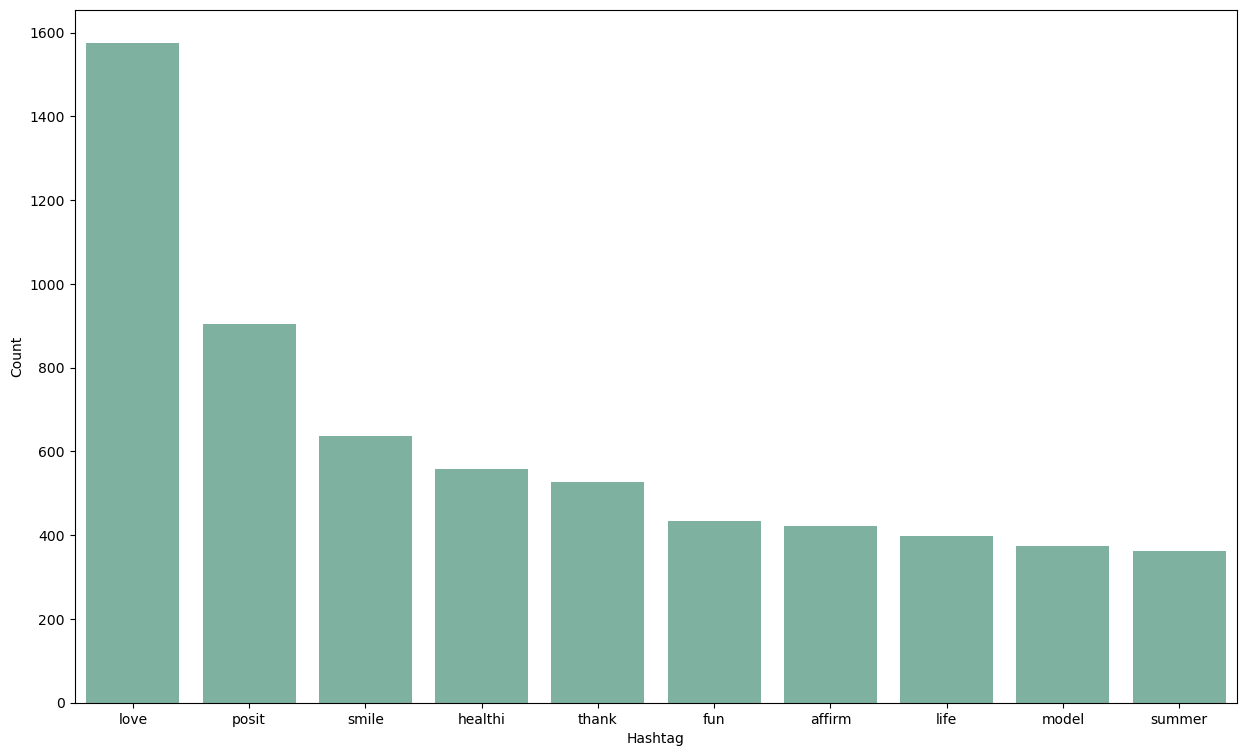

In [33]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)

sage_green = "#75b9a2"

plt.figure(figsize=(15, 9))
sns.barplot(data=d, x='Hashtag', y='Count', color=sage_green)
plt.show()

In [34]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


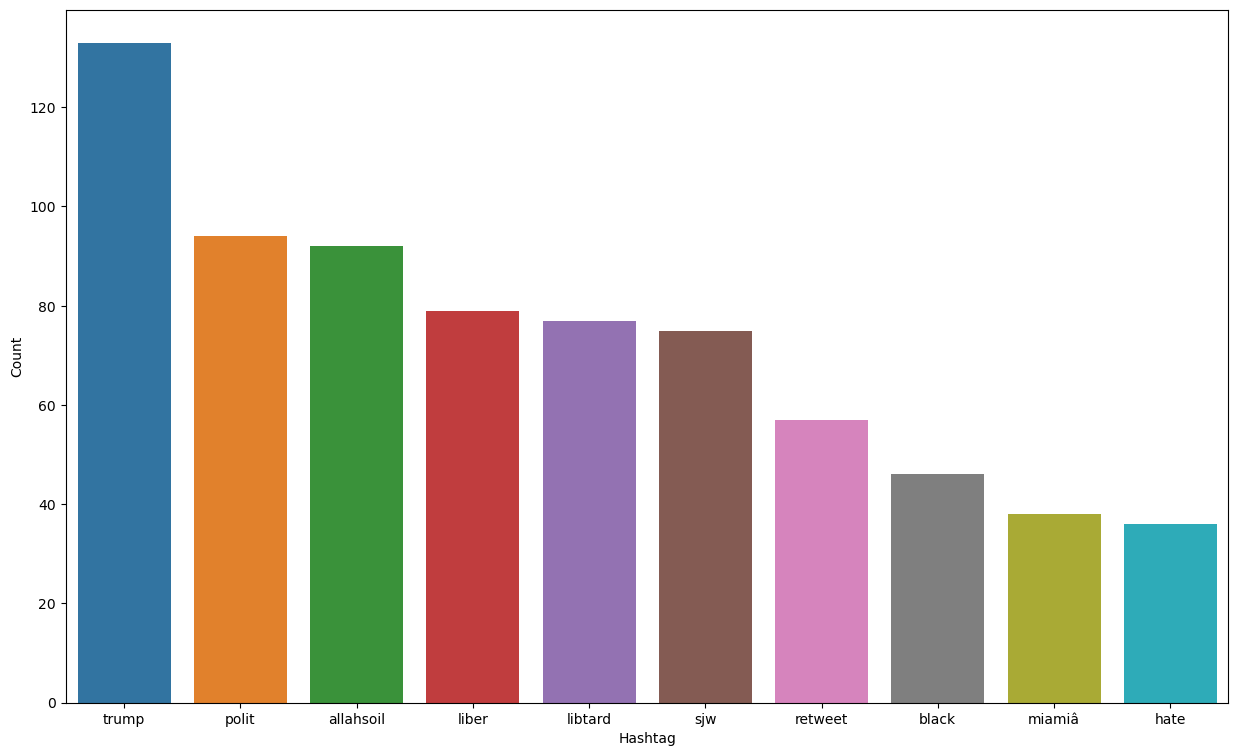

In [35]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

feature extraction

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [37]:
bow[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

In [44]:
!pip install scikit-learn
!pip install xgboost
!pip install pytorch-crf
!pip install sklearn-crfsuite

   ---------------------------------------- 0.0/155.8 kB ? eta -:--:--
   ---------- ---------------------------- 41.0/155.8 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 155.8/155.8 kB 1.9 MB/s eta 0:00:00


In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn_crfsuite import CRF
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
import xgboost as xgb

In [51]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
x_train_dense = x_train.toarray()  # Convert x_train to dense format
naive_bayes_model.fit(x_train_dense, y_train)

# SVM
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_train, y_train)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train, y_train)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

# Linear Regression
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train, y_train)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)

# XGBoost
import xgboost as xgb
xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to calculate metrics
def evaluate_model(model, x_test, y_test):
    # Predictions
    y_pred = model.predict(x_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Precision
    precision = precision_score(y_test, y_pred)
    
    # Recall
    recall = recall_score(y_test, y_pred)
    
    # F1 Score
    f1 = f1_score(y_test, y_pred)
    
    return accuracy, precision, recall, f1

In [57]:
# Evaluate Naive Bayes model
naive_bayes_accuracy, naive_bayes_precision, naive_bayes_recall, naive_bayes_f1 = evaluate_model(naive_bayes_model, x_test.toarray(), y_test)

# Evaluate SVM model
svm_accuracy, svm_precision, svm_recall, svm_f1 = evaluate_model(svm_model, x_test, y_test)

# Evaluate Random Forest model
random_forest_accuracy, random_forest_precision, random_forest_recall, random_forest_f1 = evaluate_model(random_forest_model, x_test, y_test)

# Evaluate Decision Tree model
decision_tree_accuracy, decision_tree_precision, decision_tree_recall, decision_tree_f1 = evaluate_model(decision_tree_model, x_test, y_test)

# Evaluate Logistic Regression model
logistic_regression_accuracy, logistic_regression_precision, logistic_regression_recall, logistic_regression_f1 = evaluate_model(logistic_regression_model, x_test, y_test)

# Evaluate XGBoost model
xgboost_accuracy, xgboost_precision, xgboost_recall, xgboost_f1 = evaluate_model(xgboost_model, x_test, y_test)


In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to calculate regression metrics
def evaluate_regression_model(model, x_test, y_test):
    # Predictions
    y_pred = model.predict(x_test)
    
    # Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred)
    
    # Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    
    # R-squared
    r2 = r2_score(y_test, y_pred)
    
    return mae, mse, r2

# Evaluate Linear Regression model
linear_regression_mae, linear_regression_mse, linear_regression_r2 = evaluate_regression_model(linear_regression_model, x_test, y_test)

In [59]:
# Display results
print("Naive Bayes:")
print("Accuracy:", naive_bayes_accuracy)
print("Precision:", naive_bayes_precision)
print("Recall:", naive_bayes_recall)
print("F1 Score:", naive_bayes_f1)
print()

print("SVM:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
print()

print("Random Forest:")
print("Accuracy:", random_forest_accuracy)
print("Precision:", random_forest_precision)
print("Recall:", random_forest_recall)
print("F1 Score:", random_forest_f1)
print()

print("Decision Tree:")
print("Accuracy:", decision_tree_accuracy)
print("Precision:", decision_tree_precision)
print("Recall:", decision_tree_recall)
print("F1 Score:", decision_tree_f1)
print()

print("Linear Regression:")
print("Mean Absolute Error:", linear_regression_mae)
print("Mean Squared Error:", linear_regression_mse)
print("R-squared:", linear_regression_r2)

print("Logistic Regression:")
print("Accuracy:", logistic_regression_accuracy)
print("Precision:", logistic_regression_precision)
print("Recall:", logistic_regression_recall)
print("F1 Score:", logistic_regression_f1)
print()

print("XGBoost:")
print("Accuracy:", xgboost_accuracy)
print("Precision:", xgboost_precision)
print("Recall:", xgboost_recall)
print("F1 Score:", xgboost_f1)

Naive Bayes:
Accuracy: 0.5362282567888875
Precision: 0.12383456849151327
Recall: 0.9266547406082289
F1 Score: 0.21847321805145506

SVM:
Accuracy: 0.9475660117632336
Precision: 0.7941176470588235
Recall: 0.33810375670840787
F1 Score: 0.47427854454203255

Random Forest:
Accuracy: 0.936178200475535
Precision: 0.5472061657032755
Recall: 0.5080500894454383
F1 Score: 0.5269016697588127

Decision Tree:
Accuracy: 0.9184082092353898
Precision: 0.4311111111111111
Recall: 0.5205724508050089
F1 Score: 0.47163695299837927

Linear Regression:
Mean Absolute Error: 0.10942396090531478
Mean Squared Error: 0.04448928208544192
R-squared: 0.31618259567007345
Logistic Regression:
Accuracy: 0.9481917156801402
Precision: 0.7561837455830389
Recall: 0.3828264758497317
F1 Score: 0.5083135391923991

XGBoost:
Accuracy: 0.9478162933299963
Precision: 0.784
Recall: 0.35062611806797855
F1 Score: 0.484548825710754


In [61]:
!pip install tensorflow

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB 2.6 MB/s eta 0:02:23
   ---------------------------------------- 0.3/377.0 MB 4.2 MB/s eta 0:01:30
   ---------------------------------------- 0.8/377.0 MB 6.6 MB/s eta 0:00:58
   ---------------------------------------- 1.6/377.0 MB 9.3 MB/s eta 0:00:41
   ---------------------------------------- 2.7/377.0 MB 12.2 MB/s eta 0:00:31
   ---------------------------------------- 3.2/377.0 MB 13.6 MB/s eta 0:00:28
   ---------------------------------------- 3.2/377.0 MB 13.6 MB/s eta 0:00:28
   ---------------------------------------- 3.2/377.0 MB 13.6 MB/s eta 0:00:28
   ---------------------------------------- 3.2/377.0 MB 13.6 MB/s eta 0:00:28
   ---------------------------------------- 3.2/377.0 MB 7.1 MB/s eta 

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [64]:
num_timesteps = 100  # Example: number of timesteps in your sequence data
num_features = 10    # Example: number of features at each timestep

In [ ]:
model = Sequential([
    LSTM(units=64, input_shape=(num_timesteps, num_features)),
    Dense(1, activation='sigmoid')
])